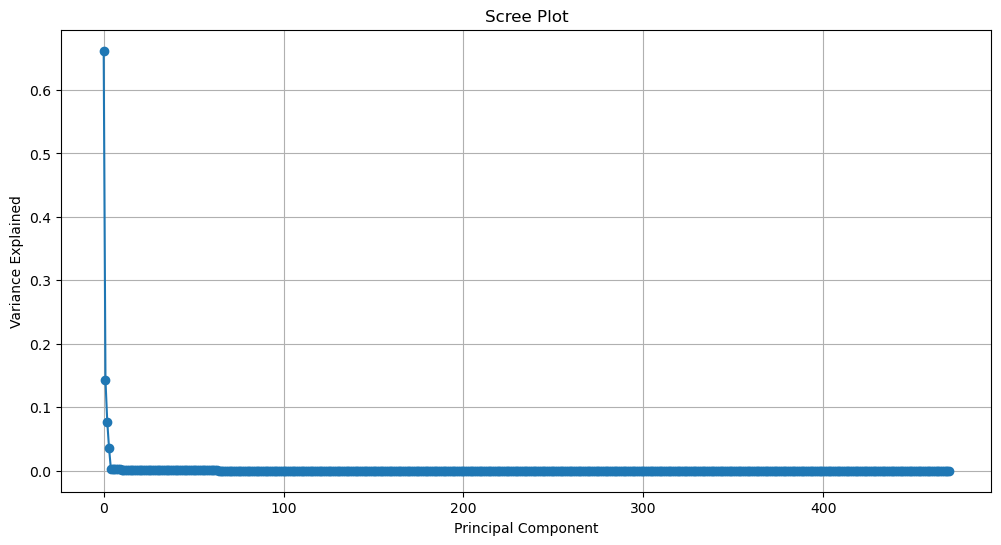

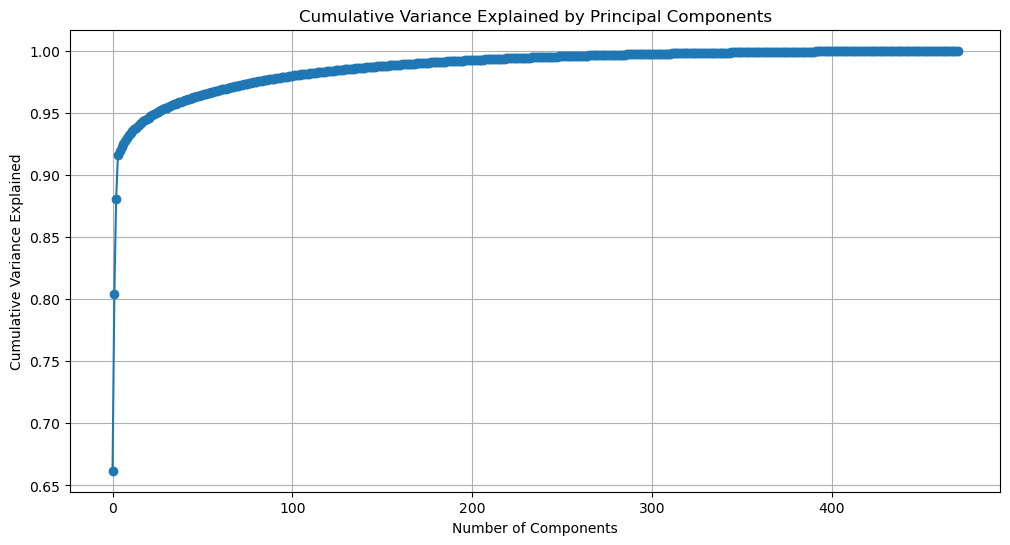

2

In [4]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Paths to the files
file_path_prices = 'SP500_close_price_no_missing.csv'
file_path_tickers = 'SP500_ticker.csv'

# Load the stock prices data
stock_prices = pd.read_csv(file_path_prices, index_col=0)

# Calculate log returns for the stock prices
log_returns = np.log(stock_prices / stock_prices.shift(1)).dropna()  # Drop the first row with NaN values

# Perform PCA on the log returns
pca = PCA()
pca.fit(log_returns)

log_returns.head()  # Display the first few rows of the log returns dataframe


# Perform PCA on the log returns
pca = PCA()
pca.fit(log_returns)

# Extract the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Create a scree plot
plt.figure(figsize=(12, 6))
plt.plot(explained_variance, marker='o')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.grid(True)
plt.show()

# Cumulative variance
cumulative_variance = np.cumsum(explained_variance)

# Create a plot for cumulative variance
plt.figure(figsize=(12, 6))
plt.plot(cumulative_variance, marker='o')
plt.title("Cumulative Variance Explained by Principal Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.grid(True)
plt.show()

# Find the number of components to retain at least 80% of total variance
num_components_80 = np.where(cumulative_variance >= 0.8)[0][0] + 1  # Adding 1 because index starts at 0

num_components_80


In [9]:
# Re-importing necessary libraries and re-loading the data
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Paths to the files
file_path_prices = 'SP500_close_price_no_missing.csv'
file_path_tickers = 'SP500_ticker.csv'

# Load the stock prices data
stock_prices = pd.read_csv(file_path_prices, index_col=0)

# Calculate log returns for the stock prices
log_returns = np.log(stock_prices / stock_prices.shift(1)).dropna()  # Drop the first row with NaN values

# Perform PCA on the log returns
pca = PCA()
pca.fit(log_returns)

log_returns.head()  # Display the first few rows of the log returns dataframe


,MMM,ACE,ABT,ANF,ADBE,AMD,AES,AET,AFL,A,...,WYN,WYNN,XEL,XRX,XLNX,XL,YHOO,YUM,ZMH,ZION
date,,,,,,,,,,,,,,,,,,,,,
2011-01-04,-0.001384,-0.000643,0.009366,-0.031688,0.007006,0.034806,0.004773,0.005141,-0.018417,-0.009356,...,-0.006214,0.030719,0.004235,-0.026830,0.004071,-0.004976,-0.009598,-0.015396,-0.013369,-0.016423
2011-01-05,0.000000,-0.003382,0.000000,-0.015596,0.022282,0.015837,0.013402,0.009569,-0.001949,-0.002172,...,-0.003286,0.012819,-0.005935,0.005249,0.003380,0.005427,0.019105,0.004747,0.000737,0.005638
2011-01-06,-0.006134,-0.004365,-0.002074,-0.033434,0.001551,-0.025001,0.017081,0.018557,-0.005514,0.001931,...,-0.014589,0.007264,-0.000851,0.000000,0.016728,-0.000451,0.008831,0.006976,-0.031440,-0.002815
2011-01-07,0.001044,-0.007481,0.004143,0.000747,-0.007153,0.015982,0.000000,0.002179,-0.003931,0.003369,...,-0.003681,0.034794,0.008896,-0.014060,-0.005656,-0.001807,-0.009423,0.012395,-0.000190,-0.010526
2011-01-10,0.010613,-0.013145,-0.008930,0.012429,0.028310,0.039961,-0.001541,0.001864,-0.012975,0.014313,...,-0.008754,-0.000253,-0.006347,0.009687,0.007976,0.000904,-0.017911,0.001413,0.007766,-0.018070


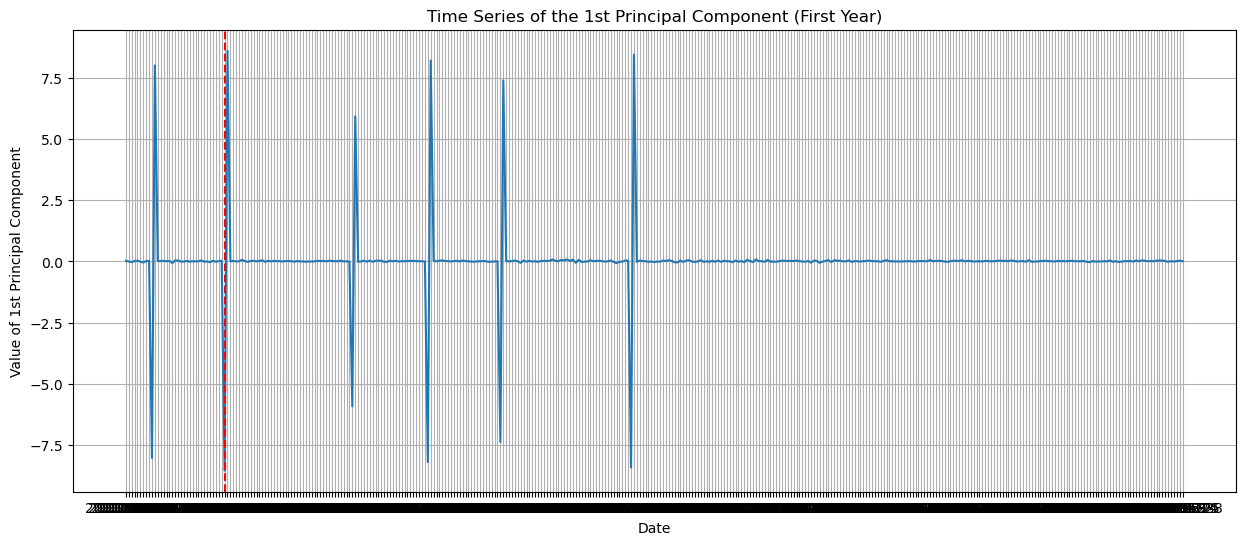

'2011-02-21'

In [10]:
# Compute the time series of the 1st principal component
first_principal_component = pca.transform(log_returns)[:, 0]

# Create a DataFrame for the time series of the 1st principal component
first_pc_series = pd.DataFrame(first_principal_component, index=log_returns.index, columns=["1st Principal Component"])

# Find the date with the lowest value for this component
min_value_date = first_pc_series.idxmin()

# Plotting a subset of the time series for better performance
plt.figure(figsize=(15, 6))
plt.plot(first_pc_series.iloc[:365])  # Plotting the first year for better performance
plt.title("Time Series of the 1st Principal Component (First Year)")
plt.xlabel("Date")
plt.ylabel("Value of 1st Principal Component")
plt.axvline(x=min_value_date[0], color='r', linestyle='--')  # Mark the date with the lowest value
plt.grid(True)
plt.show()

min_value_date[0]  # Displaying the date with the lowest value


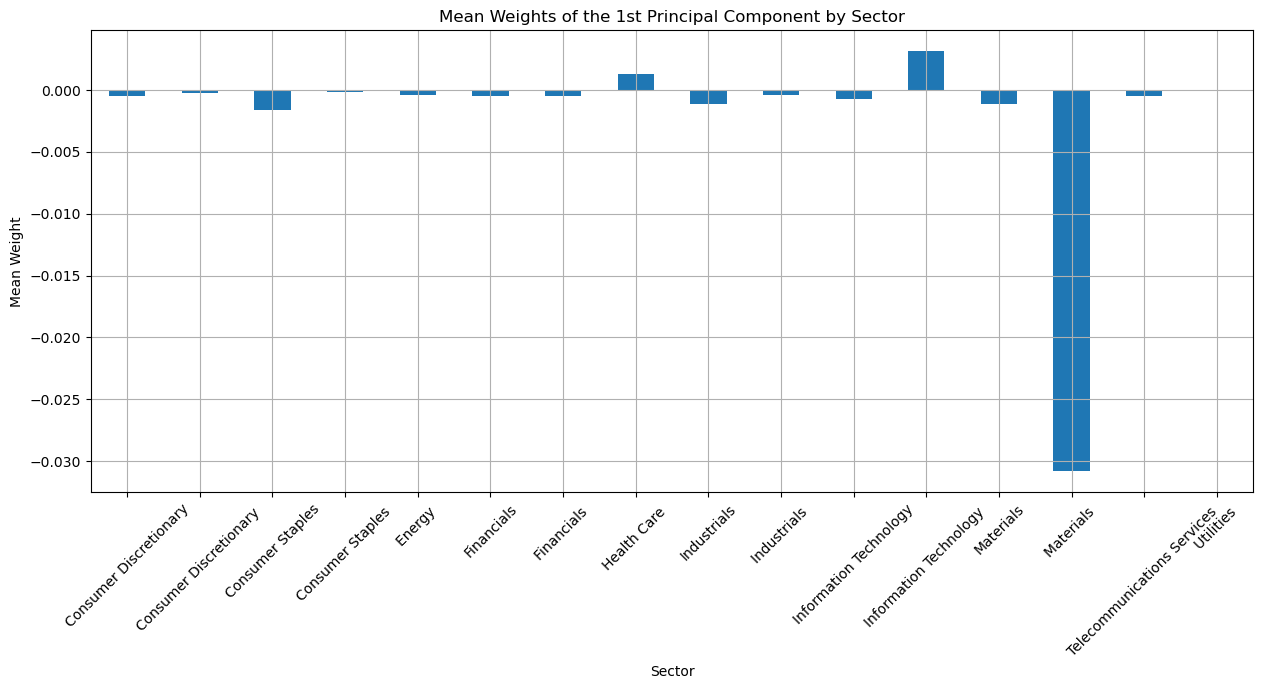

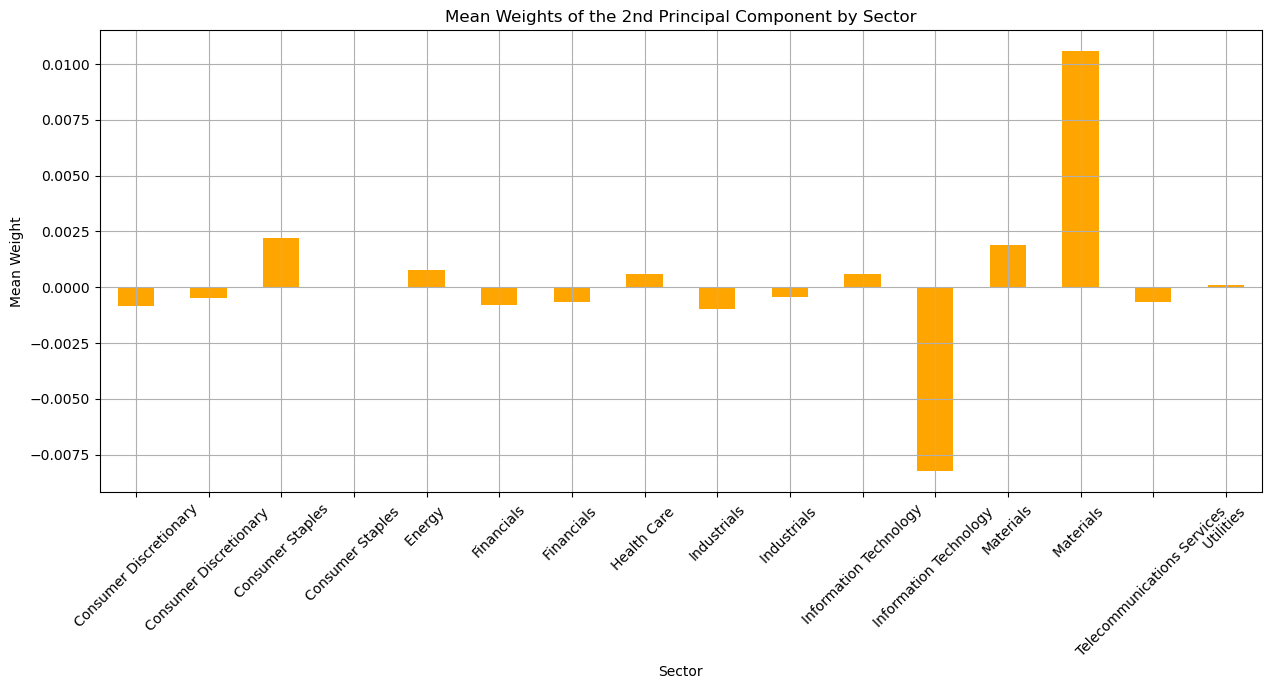

,PC1,PC2
sector,,
Consumer Discretionary,-0.000504,-0.000851
Consumer Discretionary,-0.000220,-0.000470
Consumer Staples,-0.001589,0.002228
Consumer Staples,-0.000149,-0.000043
Energy,-0.000385,0.000755
Financials,-0.000468,-0.000801
Financials,-0.000457,-0.000640
Health Care,0.001297,0.000582
Industrials,-0.001139,-0.000978


In [12]:
# Try reading the ticker information again with the correct encoding
tickers_info = pd.read_csv(file_path_tickers, encoding='ISO-8859-1')

# Extract the weights for the 1st and 2nd principal components
pc1_weights = pca.components_[0]
pc2_weights = pca.components_[1]

# Create a DataFrame for the weights
weights_df = pd.DataFrame({'PC1': pc1_weights, 'PC2': pc2_weights}, index=stock_prices.columns)

# Merge the weights with the ticker information
merged_data = pd.merge(weights_df, tickers_info, left_index=True, right_on='ticker')

# Group by sector and calculate mean weights for PC1 and PC2
sector_weights = merged_data.groupby('sector').mean(numeric_only=True)[['PC1', 'PC2']]

# Plotting the weights of the 1st principal component grouped by sector
plt.figure(figsize=(15, 6))
sector_weights['PC1'].plot(kind='bar')
plt.title("Mean Weights of the 1st Principal Component by Sector")
plt.xlabel("Sector")
plt.ylabel("Mean Weight")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plotting the weights of the 2nd principal component grouped by sector
plt.figure(figsize=(15, 6))
sector_weights['PC2'].plot(kind='bar', color='orange')
plt.title("Mean Weights of the 2nd Principal Component by Sector")
plt.xlabel("Sector")
plt.ylabel("Mean Weight")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

sector_weights  # Displaying the sector weights for further analysis


In [19]:
# importing necessary libraries for data analysis and feature selection
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import numpy as np

# loading the BMI data
bmi_data = pd.read_csv('BMI.csv')

# Preparing the data for feature selection
X = bmi_data.drop('fatpctg', axis=1)  # All features except the target variable
y = bmi_data['fatpctg']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# a) Wrapper Method: Backward and Forward Stepwise Regression
# Backward Stepwise Regression using RFE (Recursive Feature Elimination)
lr = LinearRegression()
rfe_backward = RFE(estimator=lr, n_features_to_select=1, step=1)
rfe_backward.fit(X_train_scaled, y_train)
backward_features_ranking = rfe_backward.ranking_

# Forward Stepwise Regression using RFECV (Recursive Feature Elimination with Cross-Validation)
rfecv_forward = RFECV(estimator=lr, step=1, cv=5)
rfecv_forward.fit(X_train_scaled, y_train)
forward_features_ranking = rfecv_forward.ranking_

# b) Filter Method: Ranking of features using correlation statistics
correlation_with_target = X_train.apply(lambda x: x.corr(y_train))
correlation_with_target.sort_values(ascending=False, inplace=True)

# c) Embedded Method
# (1) Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
lasso_coef = np.abs(lasso.coef_)

# (2) Random Forest (Feature Importance Ranking)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
rf_importances = rf.feature_importances_

# Summarizing the feature rankings
features_summary = pd.DataFrame({
    'Feature': X.columns,
    'Backward Ranking': backward_features_ranking,
    'Forward Ranking': forward_features_ranking,
    'Correlation with Target': correlation_with_target,
    'Lasso Coef': lasso_coef,
    'Random Forest Importance': rf_importances
}).sort_values(by='Backward Ranking')

features_summary  # Display the summary of feature rankings from different methods


,Feature,Backward Ranking,Forward Ranking,Correlation with Target,Lasso Coef,Random Forest Importance
Knee,Abdomen,1,1,0.481962,8.166980,0.669289
Chest,Weight,2,1,0.678830,0.000000,0.023675
Height,Wrist,3,1,0.056097,2.240178,0.038207
Weight,Neck,4,1,0.583941,0.774093,0.030565
Wrist,Biceps,5,1,0.262013,0.287881,0.022949
Abdomen,Age,6,1,0.807216,0.914813,0.026801
Thigh,Chest,7,1,0.518535,0.000000,0.043654
Hip,Height,8,1,0.618961,0.526422,0.031692
Neck,Thigh,9,1,0.429914,0.030072,0.012744
Biceps,Hip,10,1,0.435557,0.000000,0.029417
